### Домашнее задание №4 [0 - 0.1 балла]

**Условие:**
    
Написать аналог permutations и провести сравнение скорости работы и потребления памяти.

**Комментарий:**

Количесвто баллов зависит от полноты сравнения.

In [ ]:
import itertools as it
from datetime import datetime
from memory_profiler import memory_usage
import matplotlib.pyplot as plt

In [1]:
array = [1,2,3]

In [2]:
list(it.permutations(array))

[(1, 2, 3), (1, 3, 2), (2, 1, 3), (2, 3, 1), (3, 1, 2), (3, 2, 1)]

In [3]:
def my_permutations(array):
    return add_element([], set(array), max_len=len(array))

def add_element(array, free_el, max_len):
    
    if len(array) == max_len:
        return [tuple(array)]
    
    result = list()
    for el in free_el:
        result.extend(
            add_element(array+[el], free_el-{el}, max_len)
        )
            
    return result
        
my_permutations(array)

[(1, 2, 3), (1, 3, 2), (2, 1, 3), (2, 3, 1), (3, 1, 2), (3, 2, 1)]

### Сравнение скорости работы

In [89]:
it_perm_runtime = list()
my_perm_runtime = list()

for i in range(2,10):
    
    array = list(range(i))
    
    start = datetime.now().timestamp()
    _ = list(it.permutations(array))
    stop = datetime.now().timestamp()
    it_perm_runtime.append(stop-start)
    
    start = datetime.now().timestamp()
    _ = list(my_permutations(array))
    stop = datetime.now().timestamp()
    my_perm_runtime.append(stop-start)

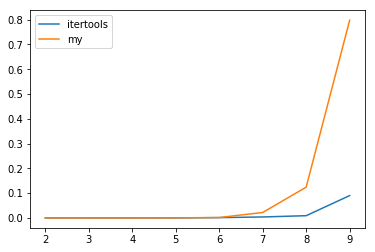

In [90]:
plt.plot(range(2,10), it_perm_runtime, label="itertools")
plt.plot(range(2,10), my_perm_runtime, label="my")
plt.legend();

Время работы моей функции значительно больше, функции из itertools. График похож на теоретический o(n!) (график ниже)

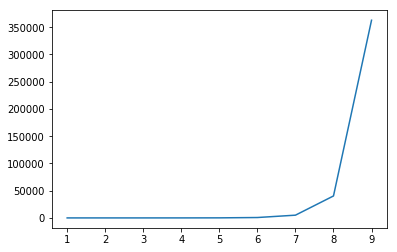

In [20]:
import numpy as np
plt.plot(np.arange(1, 10), np.cumprod(np.arange(1, 10)));

In [14]:
def it_f():
    for i in range(11):
        _ = list(it.permutations(list(range(i))))

it_mem_usage = memory_usage(it_f, interval=1e-2, timeout=None, include_children=True)

In [15]:
def my_f():
    for i in range(11):
        _ = list(my_permutations(list(range(i))))

my_mem_usage = memory_usage(my_f, interval=1e-2, timeout=None, include_children=True)

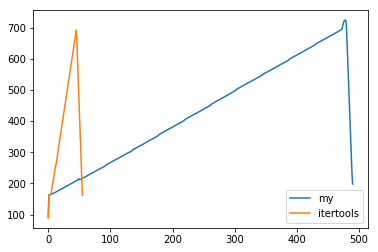

In [16]:
plt.plot(my_mem_usage, label="my")
plt.plot(it_mem_usage, label="itertools")
plt.legend();

Потреблеине памяти у моей функции и функции из itertools одинаковое, но моя выполняется дольше.